In [8]:
from utils.analysis import Signal
from utils.plotter import Hist, Hist2d
from utils.files import *
from utils.varUtils import *
from utils.useCMSstyle import *
plt.style.use(CMS)

In [2]:
signal = Signal(get_NMSSM(700,400,jets='dnn'))

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/dnn/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root


In [3]:
signal.get('b_6j_score')

<Array [1, 0.0152, 1, ... 0.129, 0.0808] type='55951 * float32'>

In [5]:
from utils.analysis.tree import Tree

In [6]:
qcd = Tree(get_qcd_list('dnn'))

In [32]:
qcd.scale

array([1.86406918e+03, 2.60255677e+02, 8.86679273e+01, 9.60683031e+00,
       9.60484013e+00, 2.09229090e+00, 1.55271391e-01, 9.73436346e-02,
       3.93201435e+04, 6.21913888e+03, 1.62183756e+03, 3.49642828e+02,
       1.10774858e+02, 6.26295276e+01, 2.28302060e+01, 8.55304142e+00])

In [31]:
qcd.tree[0]['b_6j_score'].array()

<Array [6.21e-05, 0.0172, ... 0.000894, 0.0741] type='9 * float32'>

(25,) [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.98557728e+07 1.22390259e+07
 5.73175817e+06 2.14728560e+06 7.27425931e+05 2.09294329e+05
 5.46197523e+04 1.86242235e+04 4.77464209e+03 1.59335461e+03
 2.04842308e+02 1.73638696e+02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


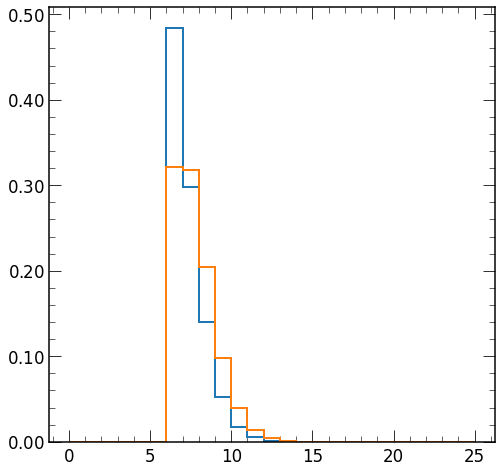

In [10]:
fig, ax = plt.subplots()

n_arr = []
for tree, scale in zip(qcd.tree, qcd.scale):
    n, e = np.histogram(tree['n_jet'].array(library='np'), bins=np.arange(26))
    n_arr.append(n*scale)

n_arr = np.row_stack(n_arr)
n_arr = n_arr.sum(axis=0)
print(n_arr.shape, n_arr)

_ = Hist(x_bins(np.arange(26)), weights=n_arr, bins=np.arange(26), ax=ax)
_ = Hist(signal.n_jet, bins=np.arange(26), ax=ax)

In [228]:
upper = 1 + 1e-6

In [229]:
score_bins = np.linspace(0,upper,42)
score_bins

array([0.        , 0.02439027, 0.04878054, 0.0731708 , 0.09756107,
       0.12195134, 0.14634161, 0.17073188, 0.19512215, 0.21951241,
       0.24390268, 0.26829295, 0.29268322, 0.31707349, 0.34146376,
       0.36585402, 0.39024429, 0.41463456, 0.43902483, 0.4634151 ,
       0.48780537, 0.51219563, 0.5365859 , 0.56097617, 0.58536644,
       0.60975671, 0.63414698, 0.65853724, 0.68292751, 0.70731778,
       0.73170805, 0.75609832, 0.78048859, 0.80487885, 0.82926912,
       0.85365939, 0.87804966, 0.90243993, 0.9268302 , 0.95122046,
       0.97561073, 1.000001  ])

In [230]:
x_bins(score_bins).shape, score_bins.shape, n_arr.shape

((41,), (42,), (41,))

(41,) [28853189.61330866  1903882.61223491  1032238.26528995   685777.6442169
   511209.70148302   405983.54198803   353303.55230718   331830.32054629
   272581.12127743   263698.64448779   229619.47303359   219230.47750104
   213344.03521225   210600.60982077   159976.44743867   167790.31893959
   159401.66506549   138377.79022308   158767.90591102   132429.4296133
   152288.49418322   138757.43041525   139943.05326035   137412.6245405
   126178.9020918    133555.60524237   128777.88811214   115895.51736398
   143217.82685317   127517.34264575   139714.99804025   146709.75786633
   154743.02310974   174829.00877713   161547.92780573   190677.04733786
   227004.23383186   217365.75700225   294586.7981128    372592.36645033
  1164004.38774303]


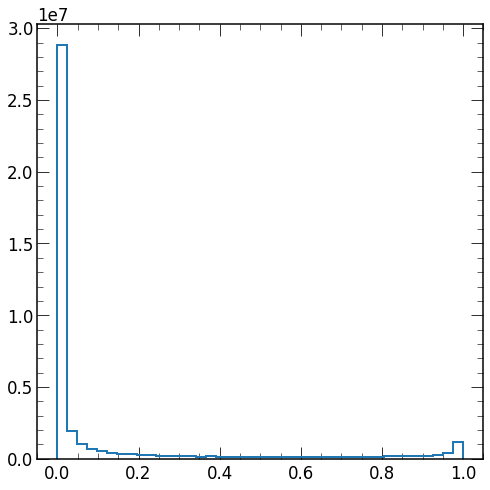

In [231]:
fig, ax = plt.subplots()

n_arr = []
for tree, scale in zip(qcd.tree, qcd.scale):
    n, e = np.histogram(tree['b_6j_score'].array(library='np'), bins=score_bins)
    n_arr.append(n*scale)

n_arr = np.row_stack(n_arr)
n_arr = n_arr.sum(axis=0)
print(n_arr.shape, n_arr)

_ = Hist(x_bins(score_bins), weights=n_arr, bins=score_bins, ax=ax, density=False)

In [232]:
signal_ratio_pass = []
for s in score_bins:
    signal_ratio_pass.append((signal.evt_score > s).to_numpy().sum() / len(signal.evt_score))

signal_ratio_pass = np.asarray(signal_ratio_pass)
bkg_ratio_fail = np.append(np.array((0)), n_arr[::-1].cumsum()/n_arr.sum())

In [234]:
signal_ratio_pass, bkg_ratio_fail

(array([1.        , 0.75280156, 0.71787814, 0.69619846, 0.67907633,
        0.6662258 , 0.65493021, 0.6446891 , 0.63585995, 0.62787082,
        0.62082894, 0.6146807 , 0.60853247, 0.60191954, 0.59612876,
        0.59073118, 0.58517274, 0.57952494, 0.57418098, 0.56885489,
        0.56347518, 0.55805973, 0.55280513, 0.54738968, 0.54147379,
        0.53579025, 0.52974924, 0.52402995, 0.51811406, 0.51216243,
        0.50546013, 0.49886508, 0.49200193, 0.48451323, 0.47647048,
        0.46710515, 0.45652446, 0.44415649, 0.42889314, 0.40835731,
        0.37582885, 0.        ]),
 array([0.        , 0.02839689, 0.03748661, 0.04467331, 0.04997613,
        0.0555141 , 0.06016583, 0.06410693, 0.06837203, 0.07214712,
        0.07572624, 0.0791347 , 0.0822456 , 0.08573952, 0.08856689,
        0.09170854, 0.09496675, 0.09804499, 0.10139729, 0.10481132,
        0.10819643, 0.11191164, 0.11514237, 0.11901565, 0.1223915 ,
        0.12628024, 0.13037363, 0.13427639, 0.13941418, 0.14461889,
        0.1499

[]

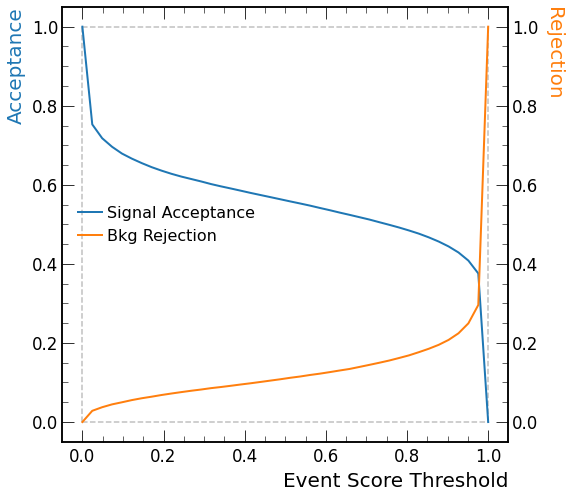

In [246]:
fig, ax = plt.subplots()

ax.plot([0,1], [0,0], color='gray', ls='--', alpha=0.5)
ax.plot([0,0], [0,1], color='gray', ls='--', alpha=0.5)
ax.plot([0,1], [1,1], color='gray', ls='--', alpha=0.5)
ax.plot([1,1], [0,1], color='gray', ls='--', alpha=0.5)

ax.plot(score_bins, signal_ratio_pass, label='Signal Acceptance', lw=2)
ax.plot(score_bins, bkg_ratio_fail, label='Bkg Rejection', lw=2)

ax_secondary = ax.twinx()

ax.set_xlabel('Event Score Threshold')

ax.set_ylabel('Acceptance', color='C0')
ax_secondary.set_ylabel('Rejection', color='C1', rotation=270, va='bottom', ha='left', y=1)#, rotation_mode='anchor', ha='right')

min_lim = -0.05
max_lim = 1.05

ax_secondary.set_xlim(min_lim, max_lim)
ax_secondary.set_ylim(min_lim, max_lim)
ax.set_xlim(min_lim, max_lim)
ax.set_ylim(min_lim, max_lim)

# ax.plot([score_bins[-2]]*2, [0,1])
ax.legend()

ax.plot()

In [257]:
score_masks = []

n_pass = []
n_all = []
for tree, scale in zip(qcd.tree, qcd.scale):
    n_pass.append((tree['b_6j_score'].array() > score_bins[-2]).to_numpy().sum()*scale)
    n_all.append((tree['b_6j_score'].array() > 0).to_numpy().sum()*scale)

n_pass = np.asarray(n_pass)
n_all = np.asarray(n_all)
# score_bins[-2]

In [258]:
n_pass.sum() / n_all.sum()

0.02839689386918209

In [260]:
(signal.evt_score > score_bins[-2]).to_numpy().sum() / len(signal.evt_score)

0.37582885024396345

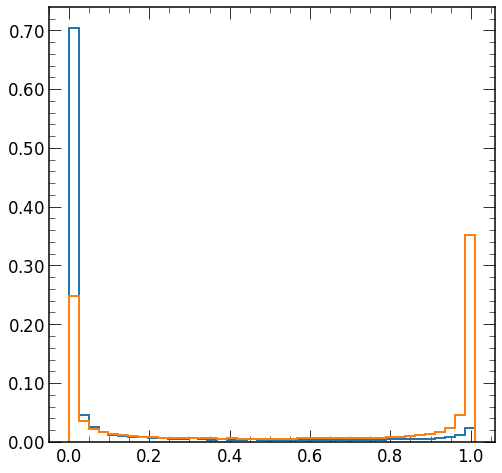

In [96]:
fig, ax = plt.subplots()

n_arr = []
for tree, scale in zip(qcd.tree, qcd.scale):
    n, e = np.histogram(tree['b_6j_score'].array(library='np'), bins=score_bins)
    n_arr.append(n*scale)

n_arr = np.row_stack(n_arr)
n_arr = n_arr.sum(axis=0)

_ = Hist(x_bins(score_bins), weights=n_arr, bins=score_bins, ax=ax)
_ = Hist(signal.get('b_6j_score'), bins=score_bins, ax=ax)

In [97]:
signal.get('b_2j_score')

AttributeError: 'Signal' object has no attribute 'b_2j_score'

In [99]:
signal.nfound_presel, signal.nfound_select, signal.nfound

(<Array [6, 4, 5, 6, 6, 6, ... 6, 6, 6, 5, 5, 5] type='55951 * int32'>,
 <Array [6, 4, 4, 6, 5, 6, ... 6, 6, 4, 5, 5, 5] type='55951 * int32'>)

In [111]:
signal.evt_score

<Array [1, 0.0152, 1, ... 0.129, 0.0808] type='55951 * float32'>

In [115]:
HX_found = (signal.HX_b1_genHflag == 0) | (signal.HX_b2_genHflag == 0)

array([   0.        ,    5.09457868,   83.33275127,  657.56454822,
       2675.38160406, 4496.87543147, 2261.99293401])

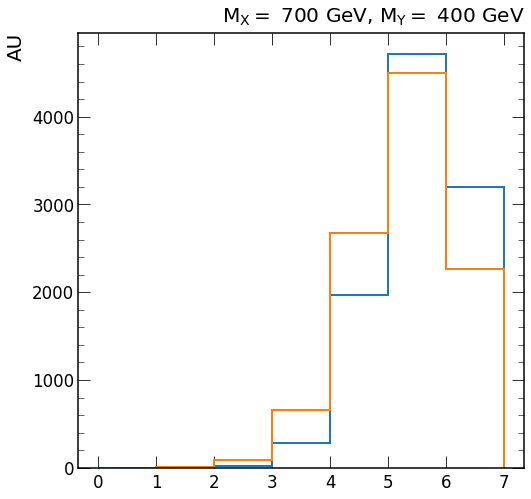

In [109]:
fig, ax = plt.subplots()

# n, ex, ey, im = Hist2d(signal.nfound_presel, signal.nfound_select, bins=np.arange(8), ax=ax)

signal.hist('nfound_presel', bins=np.arange(8), ax=ax)
signal.hist('nfound_select', bins=np.arange(8), ax=ax)
# signal.hist('nfound_paired', bins=np.arange(8), ax=ax)

# ax.minorticks_off()

# ax.set_xlabel('BFH in Preselected Jets')
# ax.set_ylabel('BFH in Selected Jets')

# fig.colorbar(im, ax=ax)

array([0.00000000e+00, 0.00000000e+00, 7.27796954e-01, 1.16447513e+01,
       1.31367350e+02, 7.91115289e+02, 2.26199293e+03])

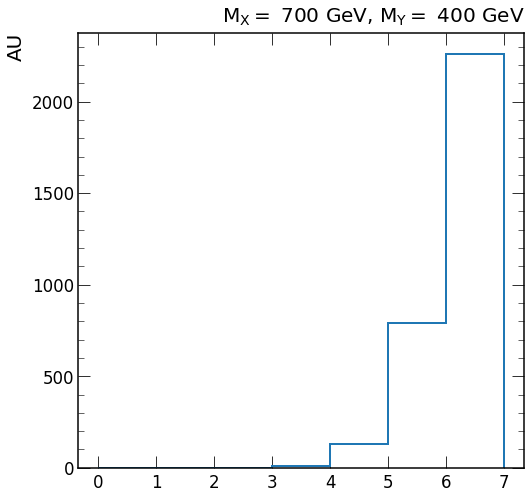

In [122]:
fig, ax = plt.subplots()

# n, ex, ey, im = Hist2d(signal.nfound_presel, signal.nfound_select, bins=np.arange(8), ax=ax)

signal.hist(signal.nfound_select[signal.nfound_presel == 6], bins=np.arange(8), ax=ax)
# signal.hist('nfound_paired', bins=np.arange(8), ax=ax)

# ax.minorticks_off()

# ax.set_xlabel('BFH in Preselected Jets')
# ax.set_ylabel('BFH in Selected Jets')

# fig.colorbar(im, ax=ax)

array([ 233.98672081,  604.98121827,    0.        , 1423.02499492])

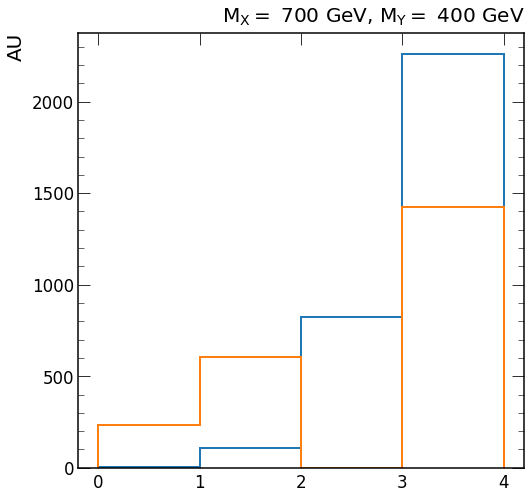

In [128]:
fig, ax = plt.subplots()

# n, ex, ey, im = Hist2d(signal.nfound_presel, signal.nfound_select, bins=np.arange(8), ax=ax)

signal.hist(signal.nfound_select_h[signal.nfound_presel_h == 3], bins=np.arange(5), ax=ax)
# signal.hist(signal.nfound_paired_h[signal.nfound_presel_h == 3], bins=np.arange(5), ax=ax)
signal.hist(signal.nfound_paired_h[signal.nfound_select_h == 3], bins=np.arange(5), ax=ax)
# signal.hist('nfound_paired', bins=np.arange(8), ax=ax)

# ax.minorticks_off()

# ax.set_xlabel('BFH in Preselected Jets')
# ax.set_ylabel('BFH in Selected Jets')

# fig.colorbar(im, ax=ax)

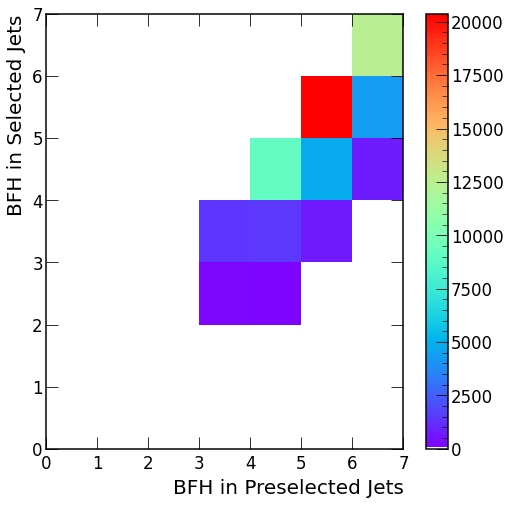

In [ ]:
fig, ax = plt.subplots()

n, ex, ey, im = Hist2d(signal.nfound_presel, signal.nfound_select, bins=np.arange(8), ax=ax)

ax.minorticks_off()

ax.set_xlabel('BFH in Preselected Jets')
ax.set_ylabel('BFH in Selected Jets')

fig.colorbar(im, ax=ax)

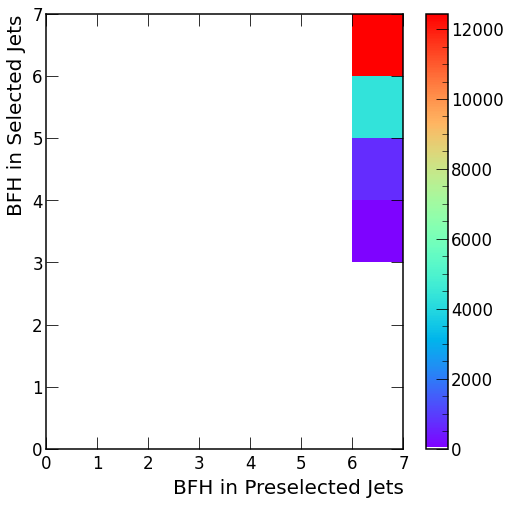

In [121]:
fig, ax = plt.subplots()

n, ex, ey, im = Hist2d(signal.nfound_presel[signal.nfound_presel == 6], signal.nfound_select[signal.nfound_presel == 6], bins=np.arange(8), ax=ax)

ax.minorticks_off()

ax.set_xlabel('BFH in Preselected Jets')
ax.set_ylabel('BFH in Selected Jets')

fig.colorbar(im, ax=ax)

In [ ]:
signal.nfound

array([2985.05920812, 3874.60903553, 1897.54860913, 1423.02499492])

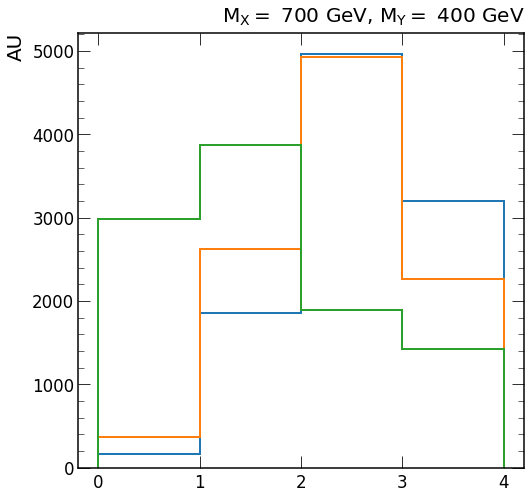

In [120]:
fig, ax = plt.subplots()

signal.hist('nfound_presel_h', bins=np.arange(5), ax=ax)
signal.hist('nfound_select_h', bins=np.arange(5), ax=ax)
signal.hist('nfound_paired_h', bins=np.arange(5), ax=ax)

In [98]:
signal.keys()

['Run',
 'LumiSec',
 'Event',
 'n_other_pv',
 'rhofastjet_all',
 'gen_X_fc_m',
 'gen_X_fc_pt',
 'gen_X_fc_eta',
 'gen_X_fc_phi',
 'gen_X_m',
 'gen_X_pt',
 'gen_X_eta',
 'gen_X_phi',
 'gen_Y_m',
 'gen_Y_pt',
 'gen_Y_eta',
 'gen_Y_phi',
 'gen_HX_m',
 'gen_HX_pt',
 'gen_HX_eta',
 'gen_HX_phi',
 'gen_H1_m',
 'gen_H1_pt',
 'gen_H1_eta',
 'gen_H1_phi',
 'gen_H2_m',
 'gen_H2_pt',
 'gen_H2_eta',
 'gen_H2_phi',
 'gen_HX_b1_m',
 'gen_HX_b1_pt',
 'gen_HX_b1_eta',
 'gen_HX_b1_phi',
 'gen_HX_b2_m',
 'gen_HX_b2_pt',
 'gen_HX_b2_eta',
 'gen_HX_b2_phi',
 'gen_H1_b1_m',
 'gen_H1_b1_pt',
 'gen_H1_b1_eta',
 'gen_H1_b1_phi',
 'gen_H1_b2_m',
 'gen_H1_b2_pt',
 'gen_H1_b2_eta',
 'gen_H1_b2_phi',
 'gen_H2_b1_m',
 'gen_H2_b1_pt',
 'gen_H2_b1_eta',
 'gen_H2_b1_phi',
 'gen_H2_b2_m',
 'gen_H2_b2_pt',
 'gen_H2_b2_eta',
 'gen_H2_b2_phi',
 'gen_HX_b1_genjet_m',
 'gen_HX_b1_genjet_pt',
 'gen_HX_b1_genjet_eta',
 'gen_HX_b1_genjet_phi',
 'gen_HX_b2_genjet_m',
 'gen_HX_b2_genjet_pt',
 'gen_HX_b2_genjet_eta',
 'gen_HX_b2

In [ ]:
signal.